In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [43]:
data = pd.DataFrame()
data[0] = np.arange(1,31)
l=[]
for i in range(30):
    if(i<10):
        l.append(random.randint(60,70))
    elif(i>10 and i<20):
        l.append(random.randint(70,80))
    else:
        l.append(random.randint(80,90))


    
data[1]= l
data.columns = ["Subjects","Marks"]
data

Subjects  Marks
0          1     69
1          2     63
2          3     68
3          4     63
4          5     66
5          6     63
6          7     67
7          8     62
8          9     64
9         10     68
10        11     90
11        12     70
12        13     78
13        14     78
14        15     78
15        16     78
16        17     70
17        18     75
18        19     70
19        20     70
20        21     86
21        22     84
22        23     89
23        24     80
24        25     88
25        26     90
26        27     86
27        28     81
28        29     87
29        30     85

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


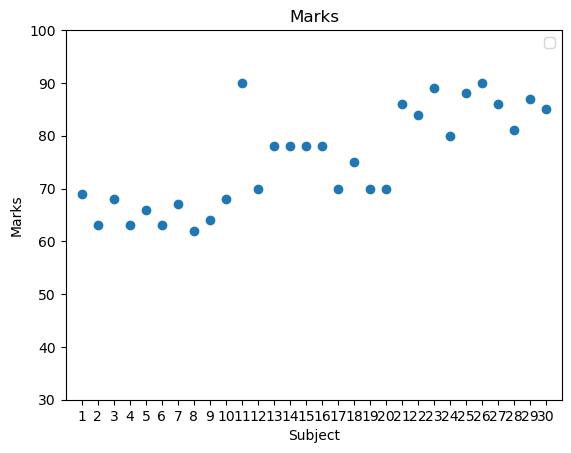

In [44]:
plt.scatter(data['Subjects'],data['Marks'])
plt.title("Marks")
plt.xlim(0,31)
plt.ylim(30,100)
plt.xticks(np.arange(1,31,1))
plt.legend()
plt.xlabel("Subject")
plt.ylabel("Marks")
plt.show()

<Axes: >

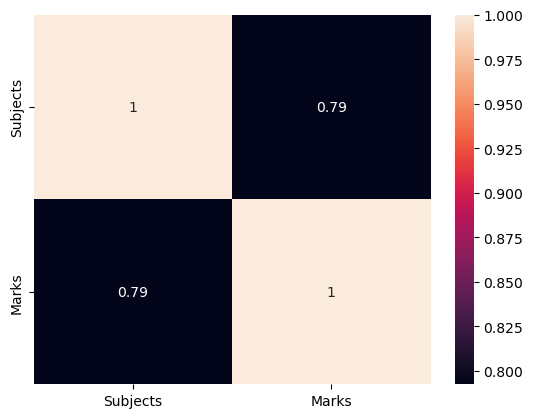

In [45]:
import seaborn as sb
data_corr = data.corr()
sb.heatmap(data_corr,annot=True)

In [46]:
from sklearn import linear_model
regress = linear_model.LinearRegression()
train_x = np.asanyarray(data[['Subjects']])
train_y = np.asanyarray(data[['Marks']])

regress.fit (train_x,train_y)
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[0.84760845]]
Intercept:  [62.3954023]


In [47]:
plt.scatter(data.Subjects,data.Marks,color='green',label='Actual')
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-r',label="Predicted")
plt.title("Marks plot")
plt.xlim(0,31)
plt.ylim(0,100)
plt.xticks(np.arange(0,31,1))
plt.legend()
plt.xlabel("Subjects")
plt.ylabel("Marks")
plt.show()

In [49]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
data['Predicted'] = y_predicted
print(y_predicted)
print(data.head())

[69] [63.24301075]
[63] [64.09061921]
[68] [64.93822766]
[63] [65.78583611]
[66] [66.63344457]
[63] [67.48105302]
[67] [68.32866148]
[62] [69.17626993]
[64] [70.02387838]
[68] [70.87148684]
[90] [71.71909529]
[70] [72.56670374]
[78] [73.4143122]
[78] [74.26192065]
[78] [75.10952911]
[78] [75.95713756]
[70] [76.80474601]
[75] [77.65235447]
[70] [78.49996292]
[70] [79.34757138]
[86] [80.19517983]
[84] [81.04278828]
[89] [81.89039674]
[80] [82.73800519]
[88] [83.58561364]
[90] [84.4332221]
[86] [85.28083055]
[81] [86.12843901]
[87] [86.97604746]
[85] [87.82365591]
[[63.24301075]
 [64.09061921]
 [64.93822766]
 [65.78583611]
 [66.63344457]
 [67.48105302]
 [68.32866148]
 [69.17626993]
 [70.02387838]
 [70.87148684]
 [71.71909529]
 [72.56670374]
 [73.4143122 ]
 [74.26192065]
 [75.10952911]
 [75.95713756]
 [76.80474601]
 [77.65235447]
 [78.49996292]
 [79.34757138]
 [80.19517983]
 [81.04278828]
 [81.89039674]
 [82.73800519]
 [83.58561364]
 [84.4332221 ]
 [85.28083055]
 [86.12843901]
 [86.9760474

In [50]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error: 4.463512544802868
Mean Squared Error: 31.89241873686812
Root Mean Squared Error: 5.647337313891222


In [51]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(data[['Subjects']])
test_y = np.asanyarray(data[['Marks']])
test_y_predicted = regress.predict(test_x)

print("Mean absolute error (MAE):" , np.mean(np.absolute(test_y_predicted - test_y)))
print("Mean square error (MSE): " , np.mean((test_y_predicted - test_y) ** 2))
print("R2-score: %.2f (RMSE):" , r2_score(test_y, test_y_predicted) )

Mean absolute error (MAE): 4.463512544802868
Mean square error (MSE):  31.89241873686812
R2-score: %.2f (RMSE): 0.6279272935914484


In [52]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data[['Subjects']], data[['Marks']], test_size=0.30, random_state=42)
print(train_x)
print("Testing")
print(test_x)

from sklearn import linear_model
regress = linear_model.LinearRegression()
regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

    Subjects
0          1
4          5
16        17
5          6
13        14
11        12
22        23
1          2
2          3
25        26
3          4
21        22
26        27
18        19
29        30
20        21
7          8
10        11
14        15
19        20
6          7
Testing
    Subjects
27        28
15        16
23        24
17        18
8          9
9         10
28        29
24        25
12        13
Coefficients:  [[0.86012415]]
Intercept:  [62.61826781]


In [53]:
y_predicted = regress.predict(test_x)
print(test_x)
print(test_y)
print(y_predicted)

    Subjects
27        28
15        16
23        24
17        18
8          9
9         10
28        29
24        25
12        13
    Marks
27     81
15     78
23     80
17     75
8      64
9      68
28     87
24     88
12     78
[[86.70174401]
 [76.38025421]
 [83.26124741]
 [78.10050251]
 [70.35938516]
 [71.21950931]
 [87.56186816]
 [84.12137156]
 [73.79988176]]


In [54]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_predicted)))

Mean Absolute Error: 3.5447498932571335
Mean Squared Error: 15.465531019089566
Root Mean Squared Error: 3.932623935629946
